predice cual es el costo del seguro medico
LINEAR REGRESSION MODEL

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df= pd.read_csv('C:/Users/Usuario/Desktop/data/siddhardhan/files/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='age', ylabel='Count'>

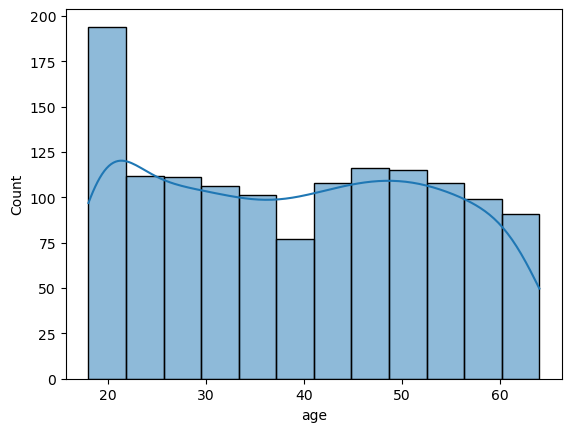

In [7]:
sns.histplot(df['age'], kde=True)

Text(0.5, 1.0, 'Sex distribucion')

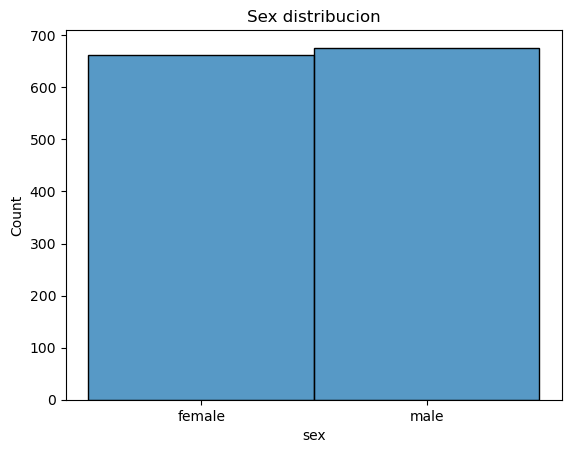

In [7]:
sns.histplot(df['sex'])
plt.title('Sex distribucion')

In [8]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Axes: xlabel='bmi', ylabel='Count'>

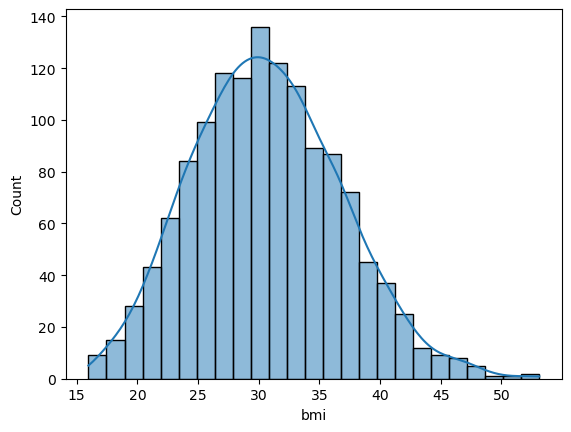

In [9]:
sns.histplot(df['bmi'], kde=True)

normal BMI range  18.5 to 24

<Axes: xlabel='children', ylabel='Count'>

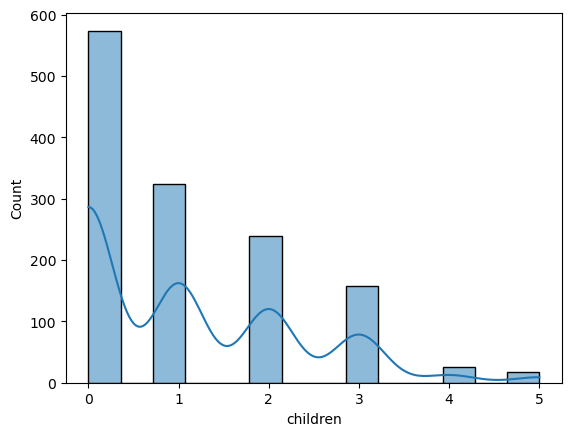

In [10]:
sns.histplot(df['children'], kde=True)

In [11]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [13]:
df.replace({'male': 0, 'female':1}, inplace= True)
df.replace({'smoker':{'yes':0, 'no':1}},inplace= True)
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace= True)

In [14]:
#split
X= df.drop(columns= 'charges', axis=1 )
Y=df['charges']
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [17]:
#trainign
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 2)

In [18]:
#linear regression model
regressor= LinearRegression()

In [19]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [20]:
#Model evaluacion
training_data_prediction = regressor.predict(X_train)


In [21]:
#r square
r2_train = metrics.r2_score (Y_train, training_data_prediction)
r2_train

0.751505643411174

In [22]:
#Model evaluacion TEST
test_data_prediction = regressor.predict(X_test)
#r square
r2_test = metrics.r2_score (Y_test, test_data_prediction )
r2_test

0.7447273869684077

In [23]:
#building a predictive system, cambiamos los strinf por su equivalente en num
input_data =[19,1,27.9,0,0,1]
input_data = np.asarray(input_data )
input_data = input_data.reshape(1,-1)

In [24]:
prediction = regressor.predict(input_data)
prediction

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25597.73941347])